<a href="https://colab.research.google.com/github/MateoRivera/network-dynamics/blob/main/H1/Punto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2
There are a set of people $\left\{ a_{1},a_{2},a_{3},a_{4} \right\}$ and a set of foods $\left\{ b_{1},b_{2},b_{3},b_{4} \right\}$. Each person is interested in a subset of foods, specifically $$a_{1} \to \left\{b_{1},b_{2}\right\}, a_{2} \to \left\{b_{2},b_{3}\right\}, a_{3} \to \left\{b_{1},b_{4}\right\}, a_{4} \to \left\{b_{1},b_{2},b_{4}\right\}$$

## Libraries

In [9]:
# Handle graphs
import networkx as nx

# Graph visualization
import matplotlib.pyplot as plt

# Matrices operation and deep copy
import copy
import numpy as np
%matplotlib inline

## Point a
Exploit max-flow problems to find a perfect match (if any).

**Solution**

In this case, we have a bipartite graph $G=\left( V=V_{0} ⋃ V_{1}, E\right)$, where $V_{0}=\left\{ a_{i}\right\}^{4}_{i=1}$, $V_{1}=\left\{ b_{i}\right\}^{4}_{i=1}$, $E_{1}=\left\{ \left( a_{1}, b_{1} \right), \left( a_{1}, b_{2} \right), \left( a_{2}, b_{2} \right), \left( a_{2}, b_{3} \right), \left( a_{3}, b_{1} \right), \left( a_{3}, b_{4} \right), \left( a_{4}, b_{1} \right), \left( a_{4}, b_{2} \right), \left( a_{4}, b_{4} \right) \right\}$, $E_{2}=\left\{ \left ( j,i \right ):\left ( i,j \right ) \in E_{1} \right\}$, $E=E_{1}⋃E_{2}$

<div>
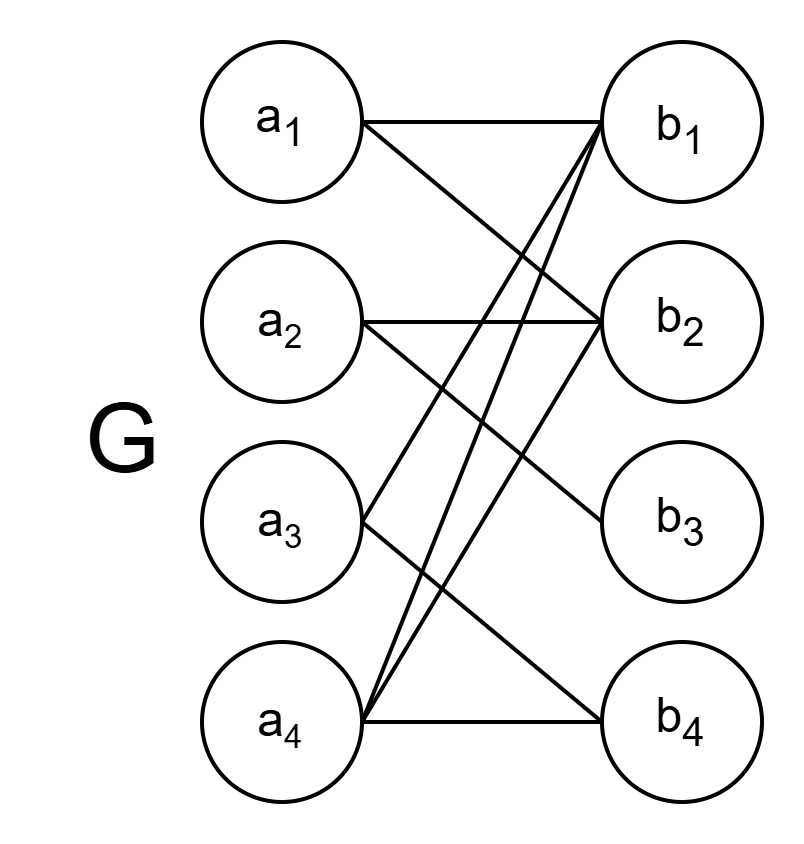
</div>

Let us consider the following capacitated directed multigraph $G_{a}=\left( V_{a}=\left\{ o \right\} ⋃ V ⋃ \left\{ d \right\}, E_{a}= \left\{ \left( o,i \right):i ∈ V_{0} \right\} ⋃ E_{1} ⋃ \left\{ \left( i,d \right):i ∈ V_{1} \right\}, \mathbf{c} \right)$ where $\mathbf{c} \in \mathbb{R}^{E_{a}} $, $c_{e}=\left\{\begin{matrix}
1 & if & e \in E_{a}\setminus E_{1} \\
\left| V_{0} \right| +1 = 5 & if & e \in E_{1} \\
\end{matrix}\right.$

<div>
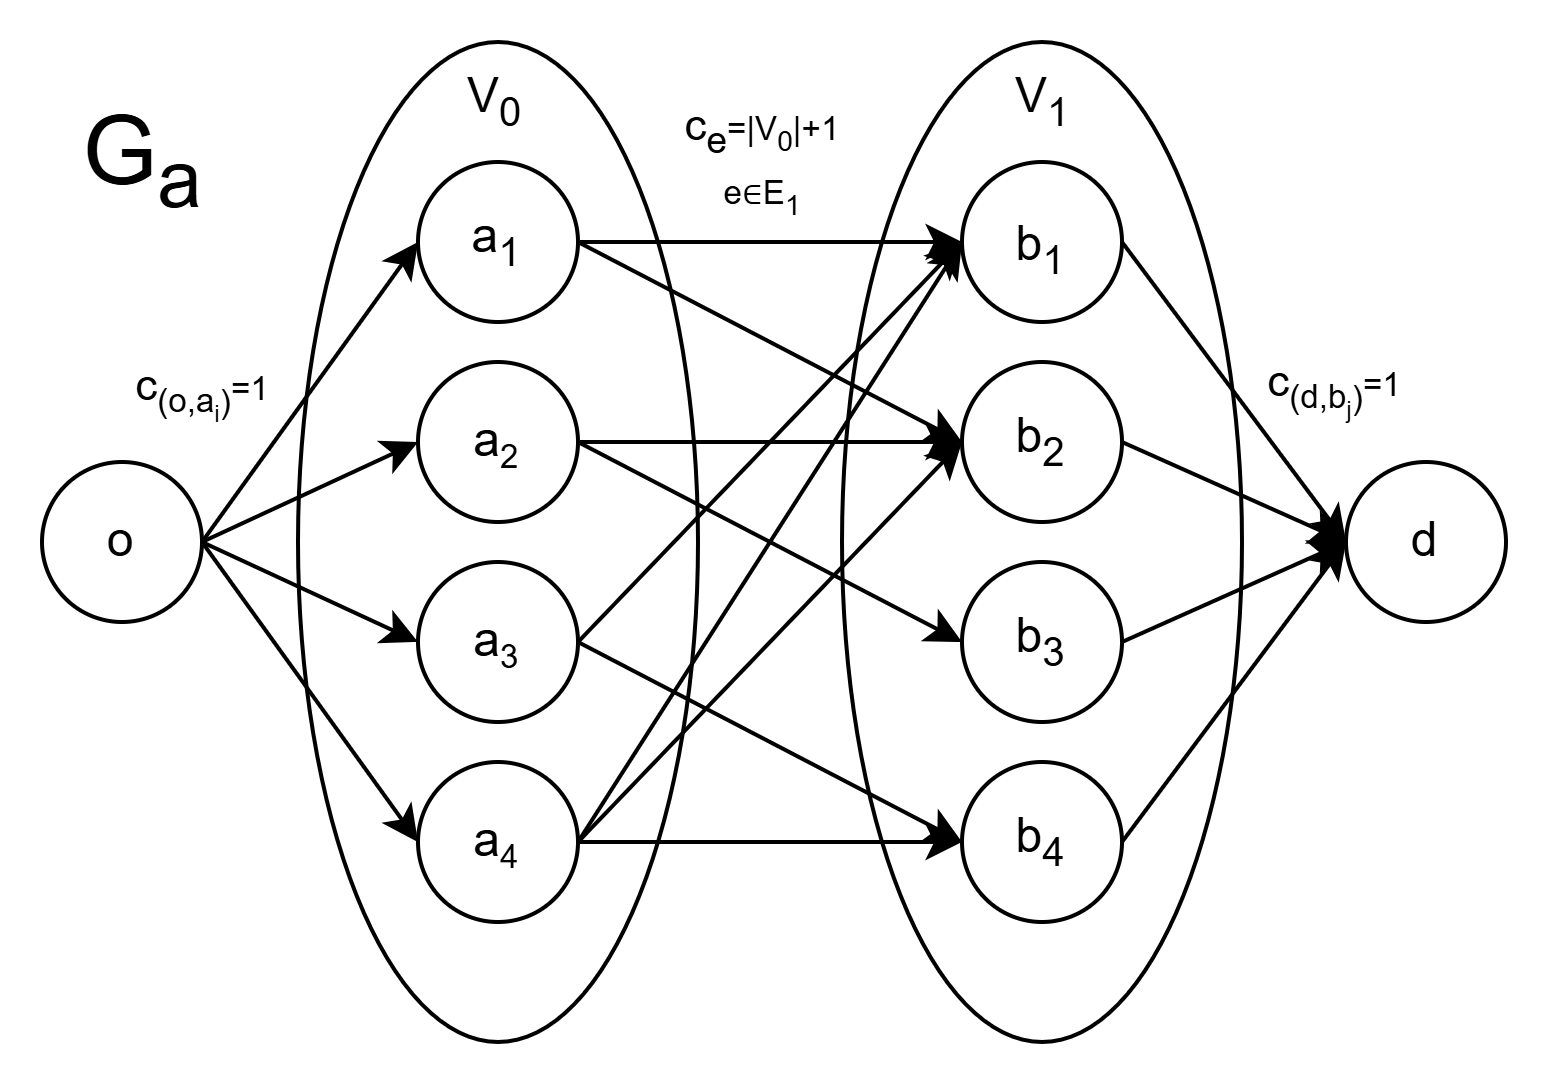
</div>

In [10]:
# G = (V = V0 U V1, E = E1 U E2)
V0 = [f'a{i}' for i in range(1, 4 + 1)]
V1 = [f'b{i}' for i in range(1, 4 + 1)]
V = V0 + V1
E1 = [('a1', 'b1'), ('a1', 'b2'), ('a2', 'b2'), ('a2', 'b3'), ('a3', 'b1'), ('a3', 'b4'), ('a4', 'b1'), ('a4', 'b2'), ('a4', 'b4')]
E2 = copy.deepcopy(E1)
E2.reverse()
E = E1 + E2

cardinality_V0 = len(V0)
cardinality_V1 = len(V1)

# G_a = (V_a = {0} U V U {d}, E_a = {(o, j)| j \in V0} U E1 U {(i, d)| i \in V1})
V_a = ['o'] + V + ['d']
E_a = [("o", f"a{i}") for i in range(1, 4 + 1)] + E1 + [(f'b{i}', 'd') for i in range(1, 4 + 1)]

n_nodes_G_bar = 1 +  cardinality_V0 + cardinality_V1 + 1

G_a = nx.DiGraph()

for e in E_a:
    G_a.add_edge(e[0], e[1], capacity=cardinality_V0 + 1 if e in E1 else 1)

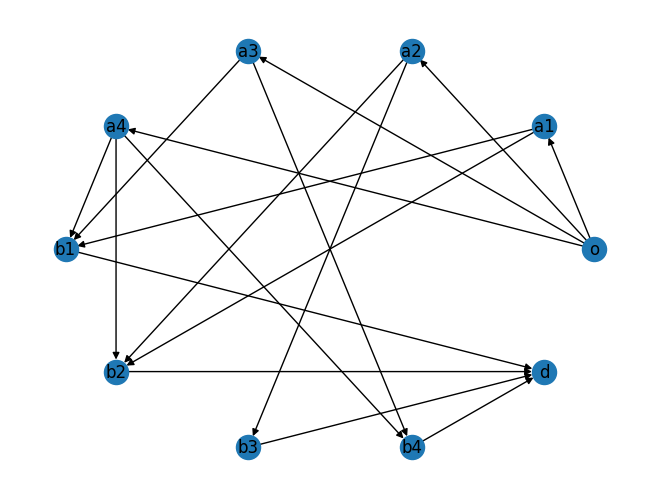

In [11]:
nx.draw_circular(G_a, with_labels=True)

"By constructing this network, the goal is to show that there is a maximum flow from $o$ to $d$ of value $\left| V_{0} \right|$; if this flow exists, it implies that each node in $V_{0}$ can be matched to a distinct node in $V_{1}$, satisfying Hall's condition for a perfect matching"

Let us apply Ford and Fulkerson's algorithm over $G_{a}$ using the library `NetworkX`, in particular the function `nx.maximum_flow`

In [12]:
flow_value_a, flow_dict_a = nx.maximum_flow(G_a, "o", "d")

In [13]:
flow_dict_a

{'o': {'a1': 1, 'a2': 1, 'a3': 1, 'a4': 1},
 'a1': {'b1': 0, 'b2': 1},
 'a2': {'b2': 0, 'b3': 1},
 'a3': {'b1': 1, 'b4': 0},
 'a4': {'b1': 0, 'b2': 0, 'b4': 1},
 'b1': {'d': 1},
 'b2': {'d': 1},
 'b3': {'d': 1},
 'b4': {'d': 1},
 'd': {}}

In [14]:
F = [(i, j) for i in flow_dict_a for j in flow_dict_a[i] if flow_dict_a[i][j] == 1 and i != 'o' and j != 'd']
F

[('a1', 'b2'), ('a2', 'b3'), ('a3', 'b1'), ('a4', 'b4')]

And we get a perfect matching because $\left|F\right|=\left|\left\{ \left( a_{1},b_{2} \right), \left( a_{2},b_{3} \right),\left( a_{3},b_{1} \right), \left( a_{4},b_{4} \right)\right\}\right|=\left|V_{0}\right|=\left|V_{1}\right|$
<div>
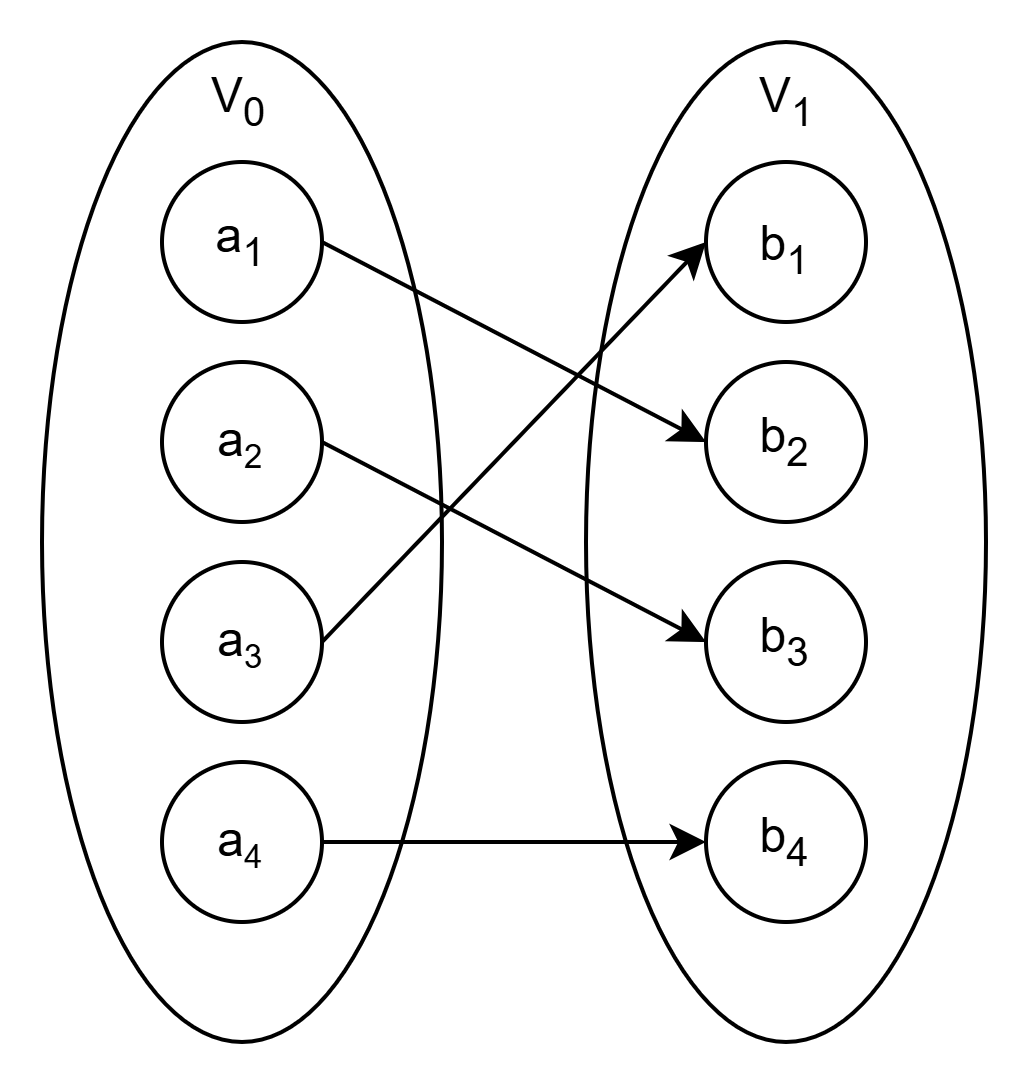
</div>

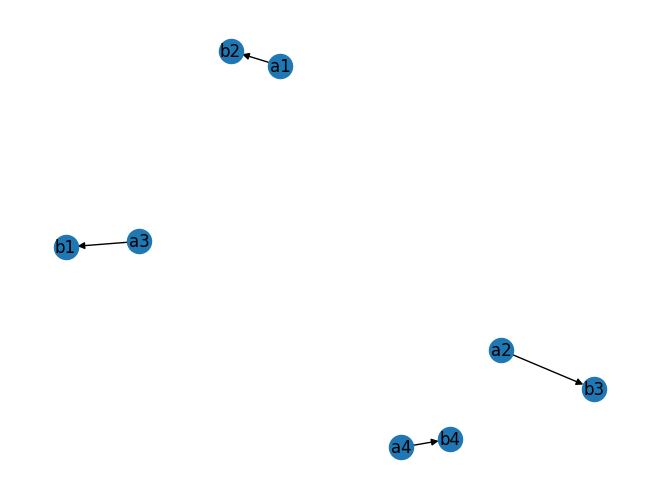

In [15]:
nx.draw(nx.DiGraph(F), with_labels = True)

## Point b
Now, assume that there are multiple portions of every food, and the distribution of the portions is $\begin{pmatrix}
2 & 3 & 2 & 2 \\
\end{pmatrix}$. Each person can take an arbitrary number of *different* foods. Exploit the analogy with max-flow problems to establish how many portions of food can be assign in total.

**Solution**

People can take an arbitrary number of different foods, this means that each person can take one portion from each of the foods they are interested in, but not multiple portions of the same type of food, so it is correct to say that the edges linking people with to their preferences have a capacity of one.
We have an additional constraint: The portion distribution of each food is limited, meaning that each food node has a capacity. This concept is called "Maximum flow with vertex capacities", where we aim to maximize the flow under the constraint of vertex capacities.

Let us illustrate this by considering the same graph $G_{a}$
<div>
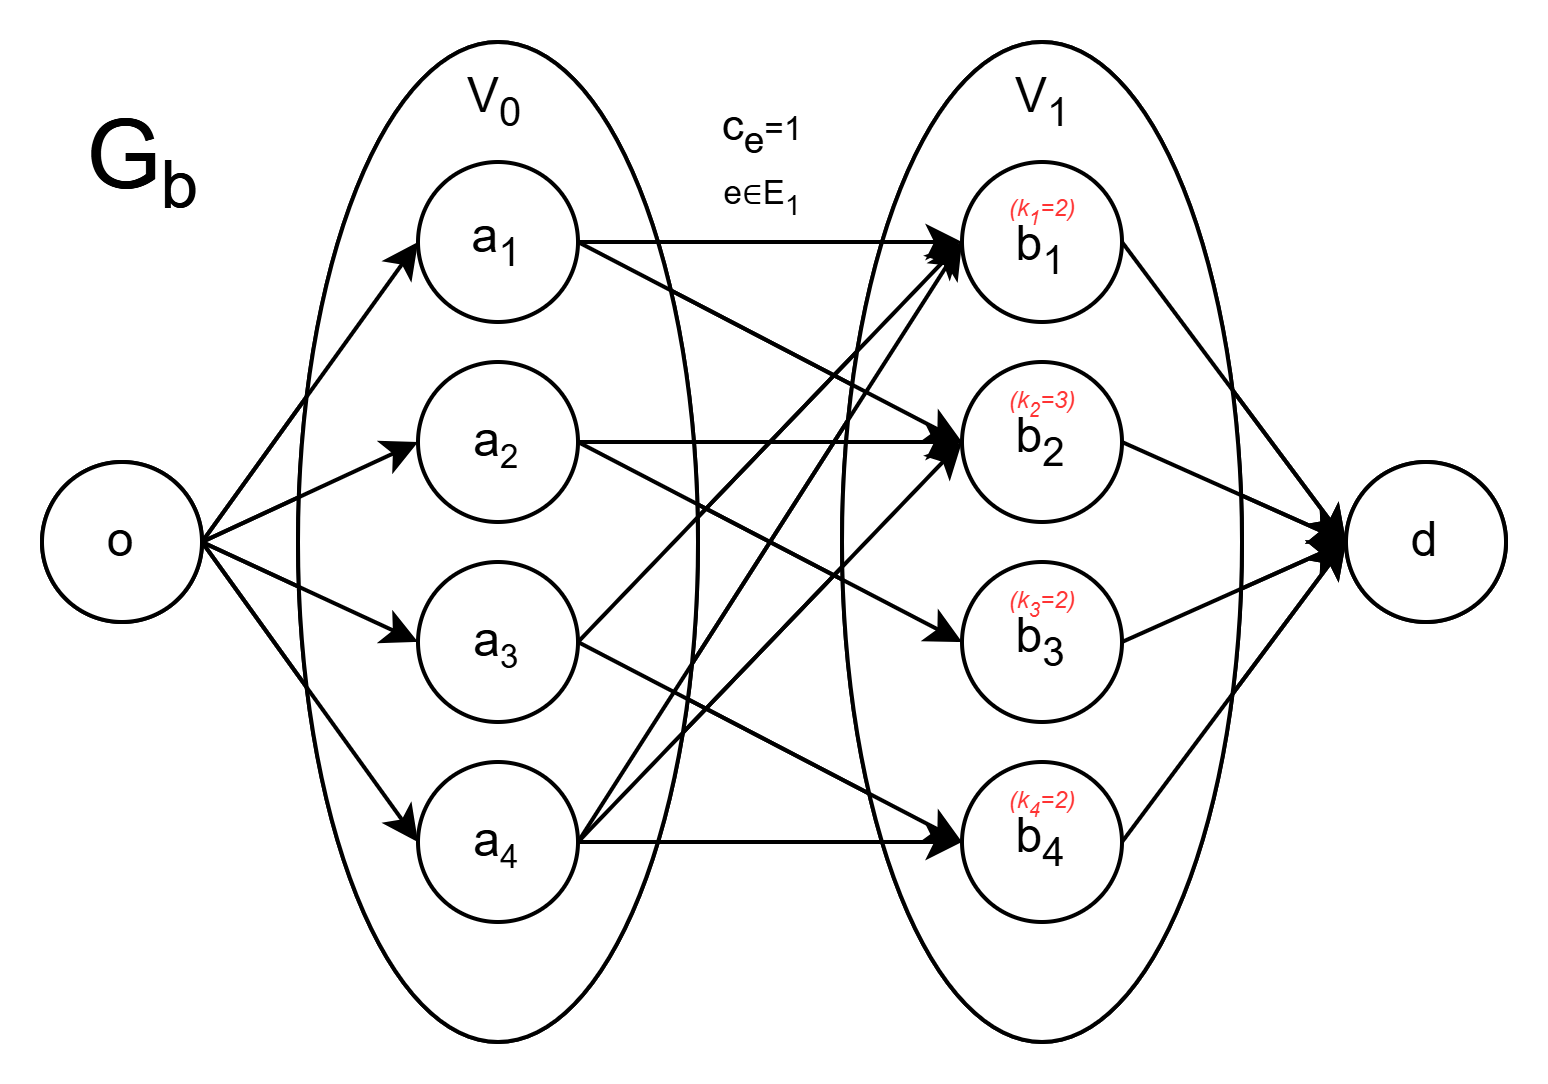

Let us define the portion distribution for each food as $ \mathbf{k}=\begin{pmatrix}
2 & 3 & 2 & 2 \\
\end{pmatrix} \in \mathbb{R}^{V_{1}}_{+}$ where $k_{i}$ represents the capacity of node $b_{i}$ and $\mathbf{c}=\mathbf{1} \in \mathbb{R}^{E_{1}}_{+}$ represents the capacities of the edges in $E_{1}$

The flow $\mathbf{f}$ has to satisfy the capacity constraint, conservation flows and vertex capacity constraint: $\sum_{i \in V}f_{ij}\leq k_{j}$ $\forall j\in V_{1}$

The way to address this problem will be as Trevisan (From Stanford University) suggests:

"... the problem can be reduced to the standard maximum flow problem, by splitting every vertex $v$ into two vertices $v_{in}$ and $v_{out}$, adding one edge $\left(v_{in}, v_{out} \right)$ of capacity $c_{v}$, and then converting every edge $\left( u,v\right)$ to an edge $\left( u, v_{in} \right)$ and every edge $\left(v,w\right)$ to an edge $\left(v_{out},w\right)$. It is easy to show that solving the (standard) maximum flow problem on the new network is equivalent to solving the maximum flow with vertex capacity constraints in the original network".

So, our graph becomes the following:
<div>
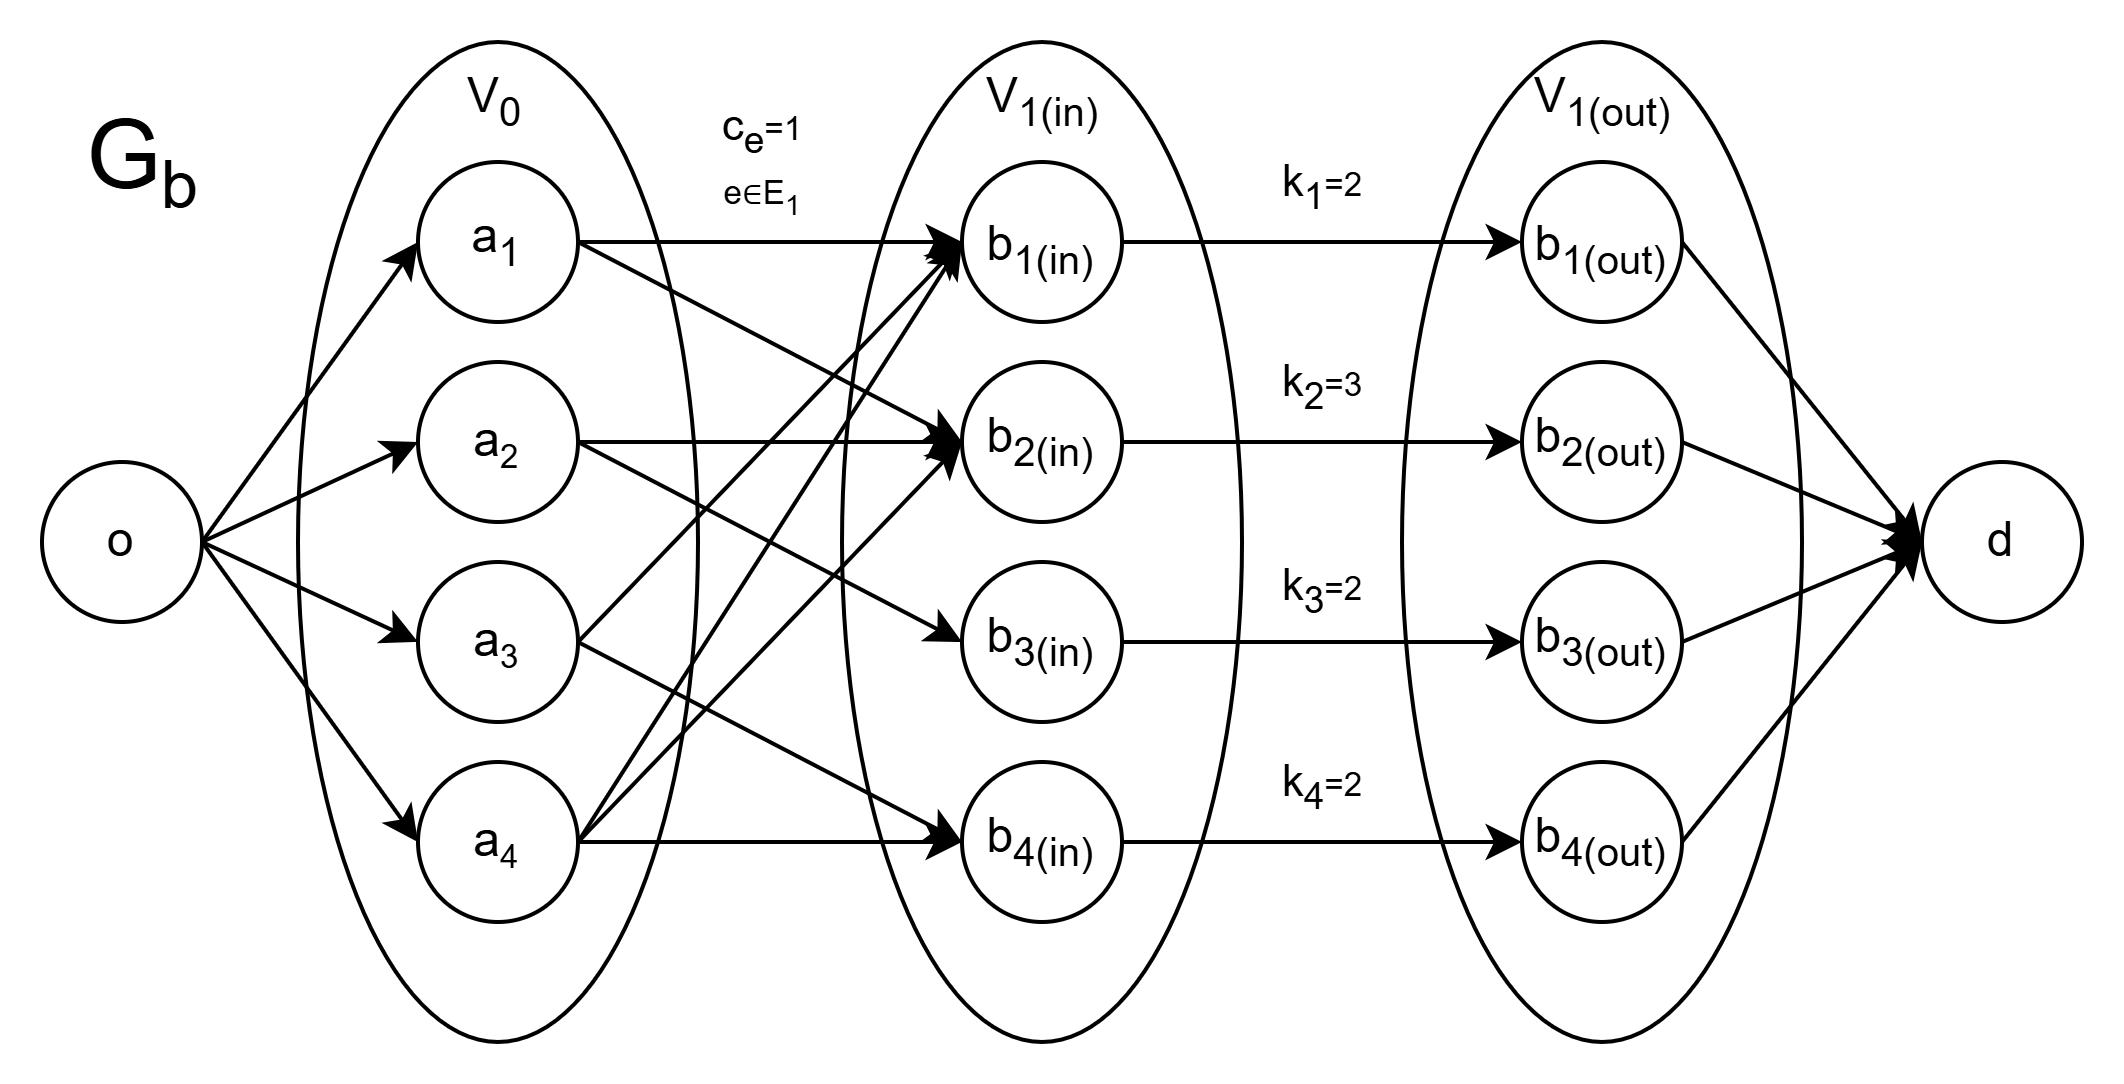
</div>

More formally $G_{b}=\left( V_{b}=\left\{ o \right\} ⋃ V_{0} ⋃ V_{1\left( in \right)} = \left\{ b_{i \left(in \right)}\right\}^{4}_{i=1} ⋃ V_{1\left( out \right)} = \left\{ b_{i \left(out \right)}\right\}^{4}_{i=1}⋃ \left\{ d \right\}, E_{b}= \left\{ \left( o,i \right):i ∈ V_{0} \right\} ⋃ \left\{ \left( i,j_{\left(in \right)} \right):\left(i,j \right) \in E_{1} \right\} ⋃ \left\{ \left(b_{i\left( in\right)}, b_{i\left( out \right)} \right) \right\}^{4}_{i=1} ⋃ \left\{ \left( i,d \right):i ∈ V_{1} \right\}, \mathbf{c} \right)$ where $\mathbf{c} \in \mathbb{R}^{E_{b}} $, $c_{e}=\left\{\begin{matrix}
+\infty  & if & e \in \left\{ \left(o, i \right):i \in V_{0} \right\} ⋃ \left\{ \left(i, d \right):i \in V_{1\left( out \right)} \right\} \\
1 & if & e \in \left\{ \left(i, j_{\left(in \right)} \right): \left( i,j \right) \in E_{1} \right\} \\
2 & if & e = \left( b_{i\left(in\right)}, b_{i\left(out\right)}\right), i=1,3,4\\
3 & if & e = \left( b_{2\left(in\right)}, b_{2\left(out\right)}\right)\\
\end{matrix}\right.$

In [16]:
V_b = ['o'] + [f'a{i}' for i in range(1, 4 + 1)] + [f'b{i}_in' for i in range(1, 4 + 1)] + [f'b{i}_out' for i in range(1, 4 + 1)] + ['d']
V_b

['o',
 'a1',
 'a2',
 'a3',
 'a4',
 'b1_in',
 'b2_in',
 'b3_in',
 'b4_in',
 'b1_out',
 'b2_out',
 'b3_out',
 'b4_out',
 'd']

In [17]:
E_b = []
for e in E_a:
    if 'b' in e[1]:
        E_b.append((e[0], e[1] + '_in'))
    elif 'b' in e[0]:
        E_b.append((e[0] + '_out', e[1]))
    else:
        E_b.append(e)
E_b += [(f'b{i}_in', f'b{i}_out') for i in range(1, 4 + 1)]
E_b

[('o', 'a1'),
 ('o', 'a2'),
 ('o', 'a3'),
 ('o', 'a4'),
 ('a1', 'b1_in'),
 ('a1', 'b2_in'),
 ('a2', 'b2_in'),
 ('a2', 'b3_in'),
 ('a3', 'b1_in'),
 ('a3', 'b4_in'),
 ('a4', 'b1_in'),
 ('a4', 'b2_in'),
 ('a4', 'b4_in'),
 ('b1_out', 'd'),
 ('b2_out', 'd'),
 ('b3_out', 'd'),
 ('b4_out', 'd'),
 ('b1_in', 'b1_out'),
 ('b2_in', 'b2_out'),
 ('b3_in', 'b3_out'),
 ('b4_in', 'b4_out')]

In [20]:
n_nodes_G_b = 1 + cardinality_V0 + cardinality_V1 + cardinality_V1 + 1
n_nodes_G_b

14

In [19]:
capacities = {
    ('b1_in', 'b1_out'): 2,
    ('b2_in', 'b2_out'): 3,
    ('b3_in', 'b3_out'): 2,
    ('b4_in', 'b4_out'): 2
    }
capacities

{('b1_in', 'b1_out'): 2,
 ('b2_in', 'b2_out'): 3,
 ('b3_in', 'b3_out'): 2,
 ('b4_in', 'b4_out'): 2}

In [21]:
G_b = nx.DiGraph()

for e in E_b:
    if 'b' in e[0] and 'b' in e[1]:
        G_b.add_edge(e[0], e[1], capacity=capacities[e])
    elif 'a' in e[0]:
        G_b.add_edge(e[0], e[1], capacity=1)
    else:
        G_b.add_edge(e[0], e[1])

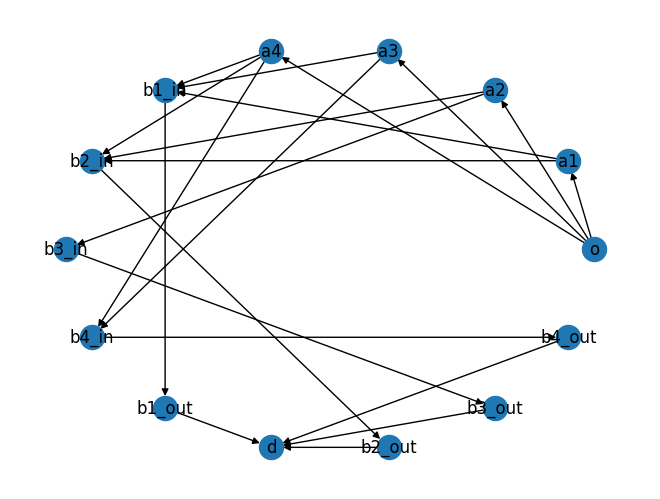

In [22]:
nx.draw_circular(G_b, with_labels=True)

In [24]:
flow_value_b, flow_dict_b = nx.maximum_flow(G_b, "o", "d")
flow_value_b, flow_dict_b

(8,
 {'o': {'a1': 1, 'a2': 2, 'a3': 2, 'a4': 3},
  'a1': {'b1_in': 0, 'b2_in': 1},
  'a2': {'b2_in': 1, 'b3_in': 1},
  'a3': {'b1_in': 1, 'b4_in': 1},
  'a4': {'b1_in': 1, 'b2_in': 1, 'b4_in': 1},
  'b1_in': {'b1_out': 2},
  'b2_in': {'b2_out': 3},
  'b3_in': {'b3_out': 1},
  'b4_in': {'b4_out': 2},
  'b1_out': {'d': 2},
  'd': {},
  'b2_out': {'d': 3},
  'b3_out': {'d': 1},
  'b4_out': {'d': 2}})